# 复习：手动实现线性回归神经网络

In [1]:
# 导入所需要的包
import random
import torch
import matplotlib.pyplot as plt

In [2]:
def sample(w, b, num_samples):
    X = torch.normal(0, 1, (num_samples, len(w)))
    y = torch.matmul(X, w) + b
    noise = torch.normal(0, 0.01, y.shape)
    y += noise
    return X, y.reshape(-1, 1)

sample函数，返回值X为维度是（样本数，输入特征数）的张量，
使用torch.matmul()函数，X的每一行是一个样本，每个样本里输入特征数与w长度一致，该函数为乘积后加和，既矩阵点乘结果

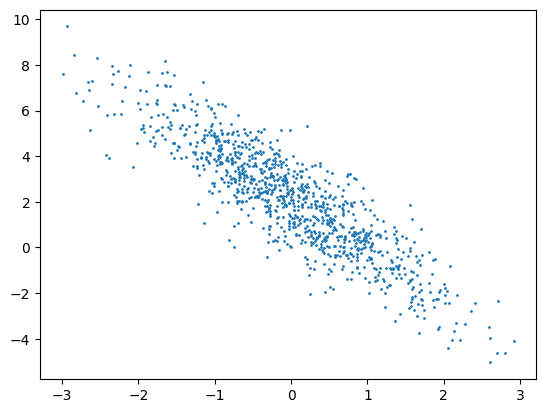

In [3]:
true_w = torch.tensor([1.1, -2.1])
true_b = 2.1
features, labels = sample(true_w, true_b, 1000)
plt.scatter(features[:, 1], labels, 1)

In [4]:
def data_iter(features, labels, batch_size):
    """
    features 为所有样本
    :param features: 
    :param labels: 
    :param batch_size: 
    :return: 
    """
    num_samples = len(features)
    indices = list(range(num_samples))
    random.shuffle(indices)
    for i in range(0, num_samples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i+batch_size,num_samples)])
        yield features[batch_indices], labels[batch_indices]

In [5]:
def square_loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

def linreg(X, w, b):
    return torch.matmul(X, w) + b

def sgd(params, lr, batch_size):
    with torch.no_grad():
        for params in params:
            params -= lr * params.grad / batch_size
            params.grad.zero_()

In [6]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss
batch_size = 10
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for epoch in range(num_epochs):
    for X, y in data_iter(features, labels, batch_size):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_loss.mean()):f}')

epoch1, loss 0.010598
epoch2, loss 0.000071
epoch3, loss 0.000048


In [7]:
w, b

(tensor([[ 1.0994],
         [-2.0996]], requires_grad=True),
 tensor([2.1006], requires_grad=True))

In [8]:
import torch
import random

In [9]:
# 首先尝试生成样本数据
def produce_data(w, b, num_samples):
    X = torch.normal(0, 1, (num_samples, len(w)))
    labels = torch.matmul(X, w) + b
    noise = torch.normal(0, 0.01, labels.shape)
    labels += noise
    return X, labels.reshape(-1, 1)

In [10]:
true_w = torch.tensor([2.1, -3.1])
true_b = 4.2
features, labels = produce_data(true_w, true_b, 1000)

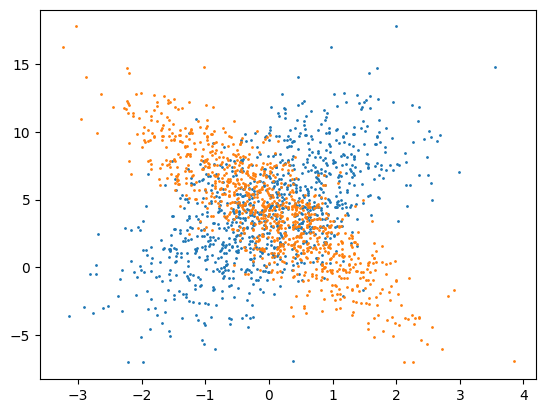

In [11]:
from matplotlib import pyplot as plt
plt.scatter(features[:,0], labels, 1)
plt.scatter(features[:,1], labels, 1)

In [12]:
def linreg(features, w, b):
    return torch.matmul(features, w) + b

def square_loss(y_hat, y):
    return (y_hat - y) ** 2 / 2

def sgd(params, lr, batch_size):
    with torch.no_grad():  # 忘记加这一步会导致梯度累加
        for param in params:
            param -= param.grad * lr / batch_size
            param.grad.zero_()

def data_iter(batch_size, features, labels):
    num_samples = len(features)
    indices = list(range(num_samples))
    # shuffle 是一个直接调用的函数
    random.shuffle(indices)
    for i in range(0, num_samples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_samples)])
        yield features[batch_indices], labels[batch_indices]
        
num_epochs = 3
lr = 0.03
net = linreg
loss = square_loss
batch_size = 10
w = torch.normal(0, 1, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        y_hat = net(X, w, b)
        l = loss(y_hat, y)
        # 这里必须调用 dataiter之中的X，y
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_loss = loss(net(features, w, b), labels)
        print(f'epoch{epoch + 1}, loss {float(train_loss.mean()):f}')

epoch1, loss 0.038589
epoch2, loss 0.000130
epoch3, loss 0.000054


In [13]:
w, b

(tensor([[ 2.1000],
         [-3.0992]], requires_grad=True),
 tensor([4.1999], requires_grad=True))

In [14]:
from torch.utils import data
import torch.nn as nn

def load_array(data_array, batch_size, is_train = True):
    dataset = data.TensorDataset(*data_array)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

In [15]:
batch_size = 10
data_iter = load_array((features, labels), batch_size, True)
data_iter

In [16]:
net = nn.Sequential(nn.Linear(2, 1))
net[0].weight.data.normal_(0, 0.01)
net[0].bias.data.fill_(0)
loss = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)
num_epochs = 3

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss(net(features), labels)
    print(f'eopch{epoch+1}, loss{l:f}')

eopch1, loss0.000204
eopch2, loss0.000108
eopch3, loss0.000108


In [17]:
net[0].weight.data

tensor([[ 2.1001, -3.0998]])

In [1]:
import gurobipy as gp